# Import modules


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Data pre-processing

### Read gene data

In [2]:
genes_to_analyse = pd.read_csv("assignment.txt", sep="\t")

### Graph first 40 genes

Text(0.5, 1.0, 'Gene expression for data preprocessing, first 40 genes')

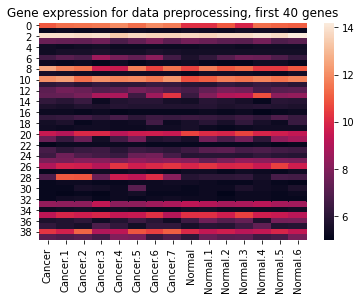

In [3]:
data_preprocessing_plot = sns.heatmap(genes_to_analyse.iloc[:40, 1:])
data_preprocessing_plot.set_title("Gene expression for data preprocessing, first 40 genes")

# Data analysis

## Gene expression analysis using means

### Calculate Cancer class mean value

In [4]:
genes_to_analyse["Cancer.Mean"] = genes_to_analyse.filter(like="Cancer").mean(axis=1)

### Calculate Normal class mean value

In [5]:
genes_to_analyse["Normal.Mean"] = genes_to_analyse.filter(like="Normal").mean(axis=1)

### Calculate delta of Cancer and Normal mean values

In [6]:
genes_to_analyse["Means.Delta"] = genes_to_analyse["Cancer.Mean"] - genes_to_analyse["Normal.Mean"]

### Sort genes based by Means.Delta

In [7]:
means_delta_sorted_genes = genes_to_analyse.sort_values(by=["Means.Delta"])

### Select first 20 and last 20 genes from `Means.Delta` sorted gene data

In [8]:
sliced_means_delta_sorted_genes = pd.concat(
    [means_delta_sorted_genes.head(20), means_delta_sorted_genes.tail(20)],
    axis=0
)

### Graph 40 gene slice

Text(0.5, 1.0, 'Gene expression for data analysis using class means delta')

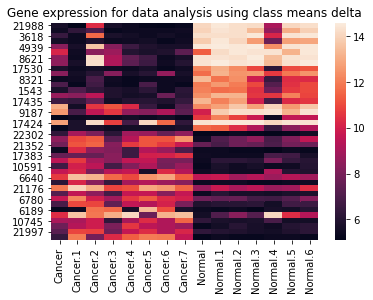

In [9]:
data_analysis_means_plot = sns.heatmap(sliced_means_delta_sorted_genes.iloc[:, 1:-3])
data_analysis_means_plot.set_title("Gene expression for data analysis using class means delta")

## Gene expression analysis using *p*-value

### Calculate *p*-value for each gene

In [10]:
genes_to_analyse["p-value"] = [
    stats.ttest_ind(
        genes_to_analyse.iloc[gene_index, 1:9], genes_to_analyse.iloc[gene_index, 9:16]
    )[-1]
    for gene_index in range(genes_to_analyse.shape[0])
]

### Calculate *p*-value significant genes

In [11]:
alpha = 0.05

In [12]:
genes_to_analyse['p-significant'] = genes_to_analyse[genes_to_analyse['p-value'] < alpha]['p-value']

### Sort genes with `p-value < 0.05` by `Means.Delta`

In [13]:
significant_means_delta_sorted_genes = genes_to_analyse.sort_values(by=["Means.Delta"])

### Slice sorted data

In [14]:
sliced_significant_means_delta_sorted_genes = pd.concat(
    [significant_means_delta_sorted_genes.head(20), significant_means_delta_sorted_genes.tail(20)], axis=0)

### Graph data slice

Text(0.5, 1.0, 'Gene expression for data analysis using p-value')

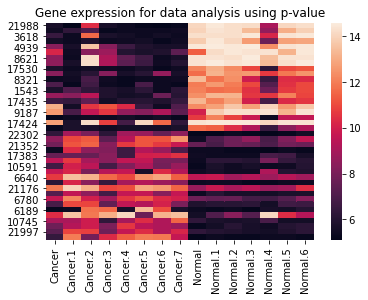

In [15]:
data_analysis_pvalue_plot = sns.heatmap(sliced_significant_means_delta_sorted_genes.iloc[:, 1:-5])
data_analysis_pvalue_plot.set_title("Gene expression for data analysis using p-value")

## Gene expression analysis using Bonferroni corrected *p*-value

### Calculate Bonferroni correction

In [16]:
bonferroni_correction = alpha / len(genes_to_analyse['p-value'])

### Calculate Bonferroni significant genes

In [17]:
genes_to_analyse['Bonferroni.Significant'] = genes_to_analyse[genes_to_analyse['p-value'] < bonferroni_correction]['p-value']

### Sort Bonferroni significant genes by Means.Delta

In [18]:
bonferroni_significant_genes = genes_to_analyse[genes_to_analyse['Bonferroni.Significant'].notnull()]
bonferroni_significant_genes = bonferroni_significant_genes.sort_values(by=['Means.Delta'])

### Slice sorted data

In [19]:
sliced_bonferroni_significant_genes = pd.concat(
    [bonferroni_significant_genes.head(20), bonferroni_significant_genes.tail(20)], axis=0)

### Graph gene slice

Text(0.5, 1.0, 'Gene expression for data analysis using Bonferroni corrected p-value')

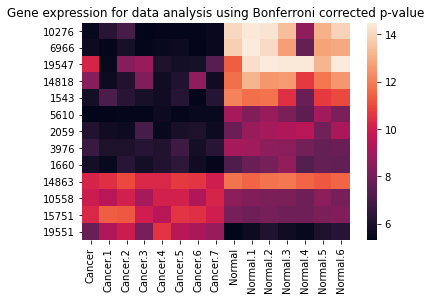

In [20]:
data_analysis_bonferroni_plot = sns.heatmap(bonferroni_significant_genes.iloc[:, 1:-6])
data_analysis_bonferroni_plot.set_title("Gene expression for data analysis using Bonferroni corrected p-value")

## Gene expression analysis using *q*-value

*q*-value formula:

$ q_i = \frac{p_i * n}{n - k} $

where

$ q_i = \text{this sample's q-value} $
 
$ p_i = \text{this sample's p-value} $
 
$ n = \text{total number of samples} $
 
$ k = \text{this sample's rank} $


### Calculate total number of samples

In [21]:
n = len(genes_to_analyse)

### Calculate *q*-value for each gene

In [22]:
genes_to_analyse['q-value'] = [
    genes_to_analyse['p-value'].iloc[gene_index] * n / (n - gene_index)
    for gene_index in range(genes_to_analyse.sort_values(by=['p-value']).shape[0])
]

### Find genes with "significant" *q*-value ($q_i \leq \alpha$)

In [23]:
genes_to_analyse['q-significant'] = genes_to_analyse[genes_to_analyse['q-value'] <= alpha]['q-value']

### Sort genes by 'Means.Delta'

In [24]:
q_value_means_delta_sorted_genes = genes_to_analyse[genes_to_analyse['q-significant'].notnull()].sort_values(by=['Means.Delta'])

### Slice sorted genes

In [25]:
slice_q_value_means_delta_sorted_genes = pd.concat(
    [q_value_means_delta_sorted_genes.head(20), q_value_means_delta_sorted_genes.tail(20)], axis=0)

### Plot gene slice

Text(0.5, 1.0, 'Gene expression for data analysis using q-value')

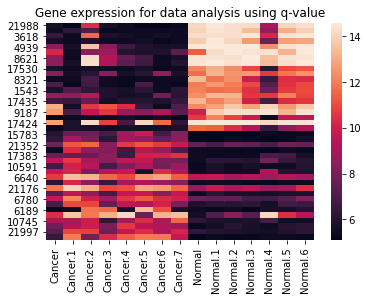

In [26]:
data_analysis_qvalue_plot = sns.heatmap(slice_q_value_means_delta_sorted_genes.iloc[:, 1:-8])
data_analysis_qvalue_plot.set_title("Gene expression for data analysis using q-value")

# Data validation

### Print genes from last gene slice

In [27]:
print(slice_q_value_means_delta_sorted_genes[['Gene']])

            Gene
21988      80254
10276        274
3618         513
6966       54576
4939        5971
19547      79412
8621        8073
9792        9580
17530      10135
14818       3007
8321        3213
14537      23451
1543        6745
2519        5106
17435     285672
6405        5973
9187   100533970
14831      11212
17424       2935
19553      64863
15783       8890
22302      23094
21352      27090
16770      84200
17383       9905
9449       84218
10591       4110
5149        8028
6640        6779
2968      339524
21176      30814
19124      54014
6780       11278
28         11315
6189        8620
8027        6493
10745       2048
19551     163486
21997      26993
12760      10252


### Read gene data for validation

In [28]:
genes_to_validate = pd.read_csv("assignment_validate.txt", sep="\t")

### Select genes from `genes_to_validate` that are in `slice_q_value_means_delta_sorted_genes` based on their `index`

In [29]:
temp = []
for gene_index in slice_q_value_means_delta_sorted_genes.index:
    if gene_index in genes_to_validate.index:
        temp.append(genes_to_validate.loc[gene_index])
gene_slice = pd.DataFrame(temp)

Text(0.5, 1.0, 'Gene expression for data validation')

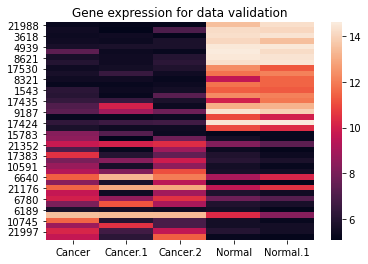

In [30]:
genes_to_validate_plot = sns.heatmap(gene_slice.iloc[:, 1:])
genes_to_validate_plot.set_title("Gene expression for data validation")

### Comment on last heatmap in relation to the heatmap of step 4 of analysis (Gene expression analysis using *q*-value)

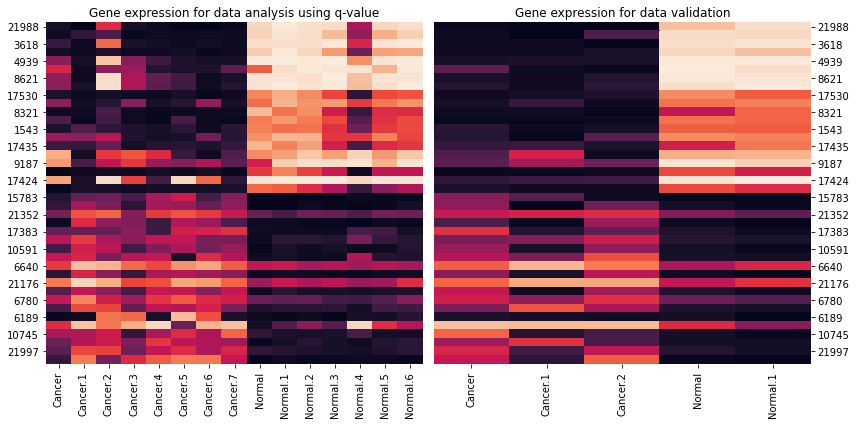

In [31]:
df1 = slice_q_value_means_delta_sorted_genes.iloc[:, 1:-8]
df2 = gene_slice.iloc[:, 1:]
 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
 
sns.heatmap(df1, ax=ax1, cbar=False)
 
sns.heatmap(df2, ax=ax2, cbar=False)
 
ax2.yaxis.tick_right()
ax1.set_title("Gene expression for data analysis using q-value")
ax2.set_title("Gene expression for data validation")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

Μια μια σύντομη ματιά τα δύο παραπάνω γραφήματα 